In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

sns.set(rc={'figure.figsize':(16,8)})

data_path = '../data/train_data/host'

In [2]:
dfs = {}
for file in os.listdir(data_path):
    print('Reading ' + file)
    dfs[file[:-4]] = pd.read_csv(data_path+'/'+file) 

Reading dcos_docker.csv
Reading os_linux.csv
Reading db_oracle_11g.csv
Reading mw_redis.csv
Reading dcos_container.csv


In [3]:
kpis = set()
for df in dfs:
    kpis = kpis.union(set(dfs[df].cmdb_id.unique()))
print((list(kpis)))

['db_010', 'os_001', 'os_010', 'redis_011', 'redis_009', 'redis_006', 'redis_001', 'os_006', 'db_011', 'docker_006', 'docker_003', 'db_002', 'db_007', 'os_007', 'docker_007', 'os_013', 'os_021', 'redis_012', 'os_019', 'docker_008', 'redis_005', 'os_004', 'os_012', 'os_015', 'db_013', 'os_008', 'os_002', 'db_005', 'db_004', 'os_005', 'container_001', 'os_014', 'os_017', 'redis_002', 'db_012', 'redis_008', 'db_003', 'db_001', 'db_006', 'db_008', 'os_018', 'redis_003', 'redis_007', 'os_003', 'docker_002', 'os_022', 'db_009', 'os_016', 'container_002', 'redis_004', 'redis_010', 'docker_004', 'os_011', 'os_020', 'docker_005', 'docker_001', 'os_009']


In [4]:
dfs['dcos_docker'].timestamp.unique()[-1]

1588607989000

In [5]:
df_info = pd.DataFrame(columns=['host_type','kpi', 'min_data', 'max_data', 'interval', 'is_flat'])
for key in dfs:
    df = dfs[key]
    for name in df.name.unique():
        df_n = df[df.name==name]
        b, s = 0, np.inf
        for host in df_n.cmdb_id.unique():
            df_nh = df_n[df_n.cmdb_id == host]
            if df_nh.shape[0] > b:
                b = df_nh.shape[0]
            if df_nh.shape[0] < s:
                s = df_nh.shape[0]
        
        if s > 720:
            row = {'host_type': key, 'kpi': name, 'min_data': s, 'max_data': b, 'interval': '1min'}
        elif s > 288:
            row = {'host_type': key, 'kpi': name, 'min_data': s, 'max_data': b, 'interval': '2min'}
        elif s > 48:
            row = {'host_type': key, 'kpi': name, 'min_data': s, 'max_data': b, 'interval': '5min'}
        else:
            row = {'host_type': key, 'kpi': name, 'min_data': s, 'max_data': b, 'interval': '<=30min'}
        row['is_flat'] = np.sum(df_n['value'] - np.mean(df_n['value'])) == 0
        df_info = df_info.append(row, ignore_index=True)
print(df_info.head())

     host_type                       kpi min_data max_data interval is_flat
0  dcos_docker    container_session_used     1372     1380     1min    True
1  dcos_docker            container_fgct     1372     1380     1min    True
2  dcos_docker        container_cpu_used     1372     1380     1min   False
3  dcos_docker     container_thread_idle     1372     1380     1min    True
4  dcos_docker  container_thread_running     1372     1380     1min    True


In [6]:
df_info.to_csv('kpi_summary_info.csv', index=False)

            itemid                  name     bomc_id      timestamp     value  \
0         63309300   Sent_errors_packets  ZJ-001-070  1588521600000  0.000000   
1  999999996431400  Processor_load_5_min  ZJ-001-005  1588521600000  0.011667   

  cmdb_id  
0  os_012  
1  os_012  


<AxesSubplot:xlabel='timestamp', ylabel='value'>

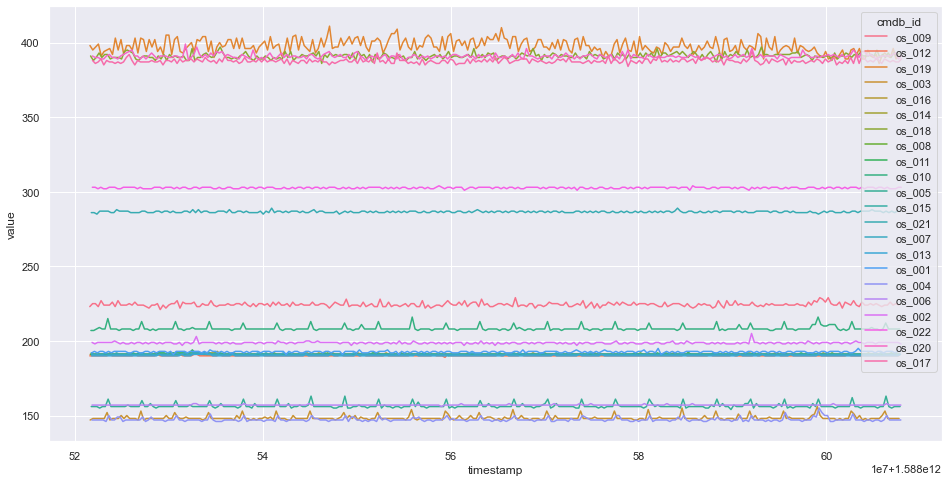

In [7]:
df = dfs['os_linux']
print(df.head(2))
sns.lineplot(x='timestamp', y='value', hue='cmdb_id', data=df[df.name == 'Num_of_processes'])


In [8]:
sns.lineplot(x='timestamp', y='value', hue='cmdb_id', data=df_docker[df_docker.name == 'container_cpu_used'][df_docker.cmdb_id=='docker_003'])

NameError: name 'df_docker' is not defined

In [11]:
df_os_linux = dfs['os_linux']

In [12]:
for name in list(df_os_linux['name'].unique()):
    total_kpis += 1

    print(name, df_os_linux[df_os_linux.name == name]['value'].sum())

Sent_errors_packets 0.0
Processor_load_5_min 675.1644509999999
Disk_rd_ios 12.0
CPU_util_pct 64169.939011
Disk_io_util 16187.315354999997
Num_of_processes 1473511.0
Send_total 9837.065547
Outgoing_network_traffic 9202.555670999998
Memory_available_pct 2059172.5899999999
Incoming_network_traffic 7583.297953
Zombie_Process 137.0
Recv_total 8758717.290057
Page_po 12335163.0
CPU_idle_pct 3103511.552033
Processor_load_1_min 664.359662
Agent_ping 31680.0
Num_of_running_processes 7626.0
ss_total 9780785.0
Processor_load_15_min 719.20726
Page_pi 564.3493679999999
Disk_avgqu_sz 2114.771192
Disk_wr_kbs 12055.04108
Disk_await 68901.82
Shared_memory 1646679308.0
CPU_user_time 30221.877012000004
Disk_svctm 33201.31999999999
Disk_wr_ios 192483.0
Memory_used_pct 1102670.89
CPU_iowait_time 2520.4566449999998
System_wait_queue_length 6746.0
CPU_system_time 20618.078096999998
Disk_rd_kbs 0.551258
Memory_available 813757.6821399999
Memory_used 348181.67344700004
System_block_queue_length 78.0
Received_pa

In [1]:
sns.lineplot(x='timestamp', y='value', hue='cmdb_id', data=df_os_linux[df_os_linux.name == 'Sent_packets'])


NameError: name 'sns' is not defined

In [20]:
len(df_os_linux[df_os_linux.cmdb_id == 'os_012'][''].unique())

51